In [1]:
import os
import time
from tqdm import tqdm_notebook # не обязательный
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Делает графики удобного размера
matplotlib.rcParams['figure.figsize'] = (8, 8)
# Делает красивый грид на графиках
sns.set_style('whitegrid')

### Pandas

Для выполнения этого блока заданий вам понадобится файл <<Данные для практической работы №1>>

In [3]:
# Загрузите данные в переменную dat и выведите размер датафрейма и первые 5 строк
# здесь ваш код:

In [4]:
dat = pd.read_csv('/Users/anastasiatolstun/Desktop/питон/view.php.csv')

In [5]:
dat.shape

(4622, 5)

In [6]:
dat.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [7]:
# Сколько пропусков в каждой из колонок (NaN) [1 балл]
# здесь ваш код:

In [8]:
dat.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [9]:
# Напечатать таблицу с 2 колонками: 1 - уникальные значения quantity, 2 - сколько раз каждое такое значение встречается [1 балл]
# (выведите их отсортированными по значениям quantity в возрастающем порядке)
# здесь ваш код:

In [10]:
dat.drop_duplicates().quantity.value_counts().sort_index()

1     4296
2      224
3       28
4       10
5        1
7        1
8        1
10       1
15       1
Name: quantity, dtype: int64

In [11]:
# Напечатать таблицу с 2 колонками: 1 - уникальные значения item_name, 2 - сколько раз каждое такое значение встречается [1 балл]
# (выведите их отсортированными по значениям встречаемости в возрастающем порядке)
# здесь ваш код:

In [12]:
dat.drop_duplicates().item_name.value_counts().sort_values(ascending=True)

Veggie Crispy Tacos                        1
Chips and Mild Fresh Tomato Salsa          1
Carnitas Salad                             1
Salad                                      2
Bowl                                       2
Crispy Tacos                               2
Steak Salad                                4
Carnitas Salad Bowl                        6
Burrito                                    6
Veggie Salad                               6
Veggie Soft Tacos                          7
Carnitas Crispy Tacos                      7
Chicken Salad                              9
Barbacoa Salad Bowl                        9
Barbacoa Crispy Tacos                     11
Chips and Roasted Chili-Corn Salsa        18
Veggie Salad Bowl                         18
Izze                                      19
Chips and Tomatillo-Red Chili Salsa       19
Chips and Roasted Chili Corn Salsa        22
Barbacoa Soft Tacos                       25
Nantucket Nectar                          27
Steak Sala

In [13]:
# Сделайте item_price типом float  (Подсказка: надо удалить знаки $) [2 балла]
# здесь ваш код:

In [14]:
dat['item_price'] = dat['item_price'].str.replace('$','').astype(float)

In [15]:
dat['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
5       10.98
6        1.69
7       11.75
8        9.25
9        9.25
10       4.45
11       8.75
12       8.75
13      11.25
14       4.45
15       2.39
16       8.49
17       8.49
18       2.18
19       8.75
20       4.45
21       8.99
22       3.39
23      10.98
24       3.39
25       2.39
26       8.49
27       8.99
28       1.09
29       8.49
        ...  
4592    11.75
4593    11.75
4594    11.75
4595     8.75
4596     4.45
4597     1.25
4598     1.50
4599     8.75
4600     4.45
4601     1.25
4602     9.25
4603     9.25
4604     8.75
4605     4.45
4606     1.25
4607    11.75
4608    11.25
4609     1.25
4610    11.75
4611    11.25
4612     9.25
4613     2.15
4614     1.50
4615     8.75
4616     4.45
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [16]:
# Создайте колонку one_item_price - стоимость одной порции блюда, которая будет равна item_price/quantity [1 балл]
# здесь ваш код:

In [17]:
dat['one_item_price'] = dat.item_price / dat.quantity

In [18]:
dat.one_item_price[:5]

0    2.39
1    3.39
2    3.39
3    2.39
4    8.49
Name: one_item_price, dtype: float64

In [19]:
# Создайте датафрейм из 3 колонок: 1 - уникальные item_name, 2 - минимальная цена(one_item_price), 3 - максимальная цена(one_item_price) [2 балла]
# Отсортируйте этот датафрейм по убыванию значения максимальной цены (one_item_price)
# Сохраните полученный датафрейм в переменную dat_gr и напечатайте его первые 5 строк
# здесь ваш код:

In [20]:
unique_item_names = np.unique(dat.item_name)

In [21]:
min_one_item_price, max_one_item_price = [], []
for unique_item in unique_item_names:
    one_item_price_for_one = dat[dat["item_name"] == unique_item]["one_item_price"]
    min_one_item_price.append(min(one_item_price_for_one))
    max_one_item_price.append(max(one_item_price_for_one))

In [22]:
my_data = np.array([unique_item_names, min_one_item_price, max_one_item_price]).T
my_columns = ["item_name", "min_one_item_price", "max_one_item_price"]
dat_gr = pd.DataFrame(data=my_data, columns=my_columns)

In [23]:
dat_gr = dat_gr.sort_values(by="max_one_item_price", ascending=False)

In [24]:
dat_gr.head(5)

,item_name,min_one_item_price,max_one_item_price
42,Steak Salad Bowl,9.39,11.89
15,Carnitas Salad Bowl,9.39,11.89
4,Barbacoa Salad Bowl,9.39,11.89
43,Steak Soft Tacos,8.99,11.75
1,Barbacoa Bowl,8.69,11.75


In [25]:
# Отсортируйте dat_gr по значению разницы между максимальной и минимальной ценами в убывающем порядке [2 балла]
# здесь ваш код:

In [26]:
dat_gr["diff"] = dat_gr["max_one_item_price"] - dat_gr["min_one_item_price"]

In [27]:
dat_gr = dat_gr.sort_values(by = 'diff', ascending = True)
dat_gr = dat_gr.drop("diff", axis=1)

In [28]:
dat_gr.head(5)

,item_name,min_one_item_price,max_one_item_price
9,Canned Soda,1.09,1.09
46,Veggie Crispy Tacos,8.49,8.49
47,Veggie Salad,8.49,8.49
33,Crispy Tacos,7.4,7.4
8,Burrito,7.4,7.4


In [29]:
# Отсортируйте item_name по длине названия и выдайте 5 самых длинных названий [1 балл]
# здесь ваш код:

In [30]:
dat_gr["len"] = dat_gr["item_name"].apply(len)

In [31]:
dat_gr.sort_values(by="len", ascending=False)["item_name"].head(5)

31    Chips and Tomatillo-Green Chili Salsa
29    Chips and Tomatillo Green Chili Salsa
30      Chips and Tomatillo Red Chili Salsa
32      Chips and Tomatillo-Red Chili Salsa
27       Chips and Roasted Chili Corn Salsa
Name: item_name, dtype: object

In [32]:
# Сколько заказов содержит ровно 1 товар? (Подсказка: заказ определяется order_id - все строки, у которых одинковый order_id - это один заказ)
# [3 балла]
# здесь ваш код:

In [33]:
unique_order_id, counts = np.unique(dat.order_id, return_counts=True)

In [34]:
sum(counts == 1)

128

In [35]:
# Выведите все виды буррито которые есть с количеством раз, сколько они встречались в датафрейме dat [3 балла]
# (Подсказка: во всех видах буррито присутствует слово "Burrito")
# здесь ваш код:

In [36]:
def check_burrito(name):
    return "Burrito" in name
burrito_is_here = dat.item_name.apply(check_burrito)
np.unique(dat[burrito_is_here]["item_name"])

array(['Barbacoa Burrito', 'Burrito', 'Carnitas Burrito',
       'Chicken Burrito', 'Steak Burrito', 'Veggie Burrito'], dtype=object)

In [37]:
# Выведите таблицу с 2 колонками: 1 - уникальные виды буритто, 2 - их стоимости, отсортированную по убыванию стоимостей [1 балл]
# здесь ваш код:

In [38]:
unique_burritos = np.unique(dat[burrito_is_here]["item_name"])
min_price_burrito = []
for item_name in unique_burritos:
    one_price_burrito = dat[dat["item_name"] == item_name]["item_price"]
    min_price_burrito.append(min(one_price_burrito))

In [39]:
unique_burritos

array(['Barbacoa Burrito', 'Burrito', 'Carnitas Burrito',
       'Chicken Burrito', 'Steak Burrito', 'Veggie Burrito'], dtype=object)

In [40]:
min_price_burrito

[8.69, 7.4, 8.69, 8.19, 8.69, 8.49]

In [41]:
my_data1 = np.array([unique_burritos, min_price_burrito]).T
my_columns = ["unique_burritos", "min_price_burrito"]
pd.DataFrame(data=my_data1, columns=my_columns).sort_values(by="min_price_burrito", ascending=False)

,unique_burritos,min_price_burrito
0,Barbacoa Burrito,8.69
2,Carnitas Burrito,8.69
4,Steak Burrito,8.69
5,Veggie Burrito,8.49
3,Chicken Burrito,8.19
1,Burrito,7.4


In [42]:
# В каком количестве заказов есть товар, который составляет более 40% от стоимости всего заказа [4 балла]
# здесь ваш код:

In [43]:
dat.head()

,order_id,quantity,item_name,choice_description,item_price,one_item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49


In [44]:
#для понимания задания делала отдельно для одного order_id
dat_one_order = dat[dat["order_id"] == 1]

In [45]:
#для понимания задания делала отдельно для одного order_id
dat_one_order

,order_id,quantity,item_name,choice_description,item_price,one_item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39


In [46]:
#для понимания задания делала отдельно для одного order_id
max_one_item_price = max(dat_one_order["one_item_price"]) 

In [47]:
#для понимания задания делала отдельно для одного order_id
sum_item_price = sum(dat_one_order["item_price"])

In [48]:
#для понимания задания делала отдельно для одного order_id
if max_one_item_price > sum_item_price*0.4:
    print(True)
else:
    print(False)

False


In [49]:
unique_order_id = np.unique(dat.order_id)

In [50]:
len(unique_order_id)

1834

In [51]:
k = 0
for i in unique_order_id:
    data_of_one_order = dat[dat["order_id"] == i]
    max_one_item_price = max(data_of_one_order["one_item_price"]) 
    sum_item_price = sum(data_of_one_order["item_price"])
    if max_one_item_price > sum_item_price*0.4:
        k += 1
print(k)   

1589


In [52]:
# Представим, что товар [Diet Coke] (choice_description) на самом деле стоил на 15% дороже, чем написано в таблице 
# (то есть вместо 1.09 -> 1.09*1.15, 1.25 -> 1.25*1.15, 6.49 -> 6.49*1.15).
# Сколько денег прошло мимо кассы, если учесть, что продавался этот товар по новой стоимости, а чек печатался по старой [2 балла]
# здесь ваш код:

In [53]:
dat.head()

,order_id,quantity,item_name,choice_description,item_price,one_item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49


In [54]:
diet_coke = dat[dat["choice_description"] == "[Diet Coke]"]["item_price"]

In [55]:
diet_coke

162     2.18
200     1.09
317     1.09
341     6.49
350     2.18
368     1.25
370     1.09
388     6.49
417     6.49
492     2.50
513     1.25
541     1.25
553     6.49
566     1.25
567     1.25
618     1.25
639     6.49
689     3.75
695     1.25
716     1.25
779     1.09
788     1.25
870     1.25
884     1.25
963     1.25
987     1.25
989     1.25
998     1.25
1045    1.25
1062    1.25
        ... 
3592    2.18
3609    2.50
3693    6.49
3699    2.50
3727    1.25
3784    1.25
3789    6.49
3793    1.09
3875    6.49
3886    6.49
4008    1.09
4016    2.50
4043    1.25
4098    3.75
4169    6.49
4170    1.25
4240    1.25
4276    1.25
4284    1.25
4363    6.49
4410    1.25
4464    1.25
4480    1.25
4513    1.25
4522    6.49
4527    6.49
4545    1.25
4571    1.25
4585    1.25
4601    1.25
Name: item_price, Length: 134, dtype: float64

In [58]:
sum_diet_cokes = sum(1.15*diet_coke-diet_coke)

In [59]:
sum_diet_cokes

49.0065

In [60]:
# Создайте датафрейм из random_matrix, удовлетворяющий следующим условиям: 
# 1) колонки датафрейма должны называться ['A', 'B', 'C', 'D', 'E']
# 2) Колонка "B" должна быть индексом
# random_matrix = np.random.randint(-5, 5, size=(15, 5))
# Сохраните полученный датафрейм на диск [1 балл]
# здесь ваш код:

In [62]:
random_matrix = np.random.randint( -5, 5, size=(15, 5))
my_data_again = np.array(random_matrix)
my_columns_again = ['A', 'B' , 'C', 'D', 'E']
h = pd.DataFrame(data=my_data_again, columns=my_columns_again)
h = h.set_index('B')

In [63]:
h

,A,C,D,E
B,,,,
-2,-5,0,-5,3
4,4,-3,-5,-3
4,2,3,4,2
1,-3,-5,1,2
-1,3,4,-1,0
2,1,-1,4,-3
-1,-5,-5,-1,-3
-1,-2,1,-3,0
-5,0,4,-2,2


### Plain python and Numpy

In [78]:
# Написать функцию, которая принимает на вход словарь: ключ - число от -3 до 5, значение - список из 4 случайных целых чисел от -5 до 5.
# На выходе функция должна должна выдать словарь, ключами которого являются уникальные значения из списков входного словаря, а значениями -
# список ключей, которые содержат данное значение. [2 балла]
# Например для словаря:
# {-3: [2, -5, -1],
#  -2: [0, 1, -1, -2],
#  -1: [3, -4, -3, -2],
#  0: [0, 3, -4],
#  1: [0, 3, -5],
#  2: [0, 4, -3],
#  3: [2, -4, -1],
#  4: [3, -4, -3, -2],
#  5: [-4, -3, -1]}
# функция должна вернуть:
# {-5: [-3, 1],
#  -4: [-1, 0, 3, 4, 5],
#  -3: [-1, 2, 4, 5],
#  -2: [-2, -1, 4],
#  -1: [-3, -2, 3, 5],
#  0: [-2, 0, 1, 2],
#  1: [-2],
#  2: [-3, 3],
#  3: [-1, 0, 1, 4],
#  4: [2]}
# сгенерировать такой словарь можно функцией: generated_dict = {i: list(set(np.random.randint(-5, 5, size=4).tolist())) for i in range(-3, 5+1)}
def inverting_func(some_dict):
    # здесь ваш код:
    resulting_dict = dict()
    values_in_input_dict = []
    for val in some_dict.values():
        values_in_input_dict.extend(val)
    unique_values_in_input_dict = np.unique(values_in_input_dict)
    for un in unique_values_in_input_dict:
        values_in_resulting_dict = []
        for key in some_dict.keys():
            if un in some_dict[key]:
                values_in_resulting_dict.append(key)
        resulting_dict[un] = values_in_resulting_dict
    return resulting_dict

In [79]:
generated_dict = {i: list(set(np.random.randint(-5, 5, size=4).tolist())) for i in range(-3, 5+1)}
test_dict = {-3: [2, -5, -1],
             -2: [0, 1, -1, -2],
             -1: [3, -4, -3, -2],
             0: [0, 3, -4],
             1: [0, 3, -5],
             2: [0, 4, -3],
             3: [2, -4, -1],
             4: [3, -4, -3, -2],
             5: [-4, -3, -1]
}
inverting_func(test_dict)

{-5: [-3, 1],
 -4: [-1, 0, 3, 4, 5],
 -3: [-1, 2, 4, 5],
 -2: [-2, -1, 4],
 -1: [-3, -2, 3, 5],
 0: [-2, 0, 1, 2],
 1: [-2],
 2: [-3, 3],
 3: [-1, 0, 1, 4],
 4: [2]}

In [66]:
# Написать функцию, которая подсчитывает количество ненулевый элементов на главное диагонали прямоугольной матрицы. 
## Пример:
# Для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.
def my_diag_product_func(x):
    # здесь ваш код:
    diag = x.diagonal()
    diag_no_0 = diag[diag != 0]
    result = len(diag_no_0)
    return result
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
my_diag_product_func(X)

2

In [80]:
# Написать функцию, выдает максимальный элемент из тех, перед которым идёт ноль. Если в массиве нет нулей - выдает "В массиве нет нулей" [1 балл]
## Пример:
# Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.
x = np.array([1, 2, 0])
def max_element(x):
    # здесь ваш код
    indexes_where_are_max = []
    for i, value in enumerate(x):
        if value == 0 and i != len(x) - 1:
            indexes_where_are_max.append(i + 1)
    if len( indexes_where_are_max) == 0:
        print("В массиве нет нулей")
    max_element = max(x[indexes_where_are_max])
    return max_element

In [81]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
max_element(x)

5

In [69]:
# Написать функцию, которая подсчитывает матрицу евклидовых расстояний между объектами, содержащимися в матрицах X и Y. [2 балла]
# (без использования scipy.spatial.disctance.cdist)
# Матрицы X и Y размерностей число объектов x размерность пространства (число объектов в X и в Y может быть различным)
## Пример:
# Для матриц: X = np.array([[6, 6, 5],   Y = np.array([[1, 1, 0],
#                           [5, 6, 5]                  [0, 0, 1]])
#                           [5, 5, 5],
#                           [6, 6, 5],
#                           [5, 6, 5]])
# Ответ должен быть: np.array([[8.66025404, 9.38083152],
#                              [8.1240384 , 8.77496439],
#                              [7.54983444, 8.1240384 ],
#                              [8.66025404, 9.38083152],
#                              [8.1240384 , 8.77496439]])
def euc_dist_matrix(X, Y):
    # здесь ваш код:
    return result


### Визуализация

In [70]:
# Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name.
# Изображайте на двух соседних графиках. Для этого может быть полезен subplot. [3 балла]

In [71]:
dat[:4]

,order_id,quantity,item_name,choice_description,item_price,one_item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39


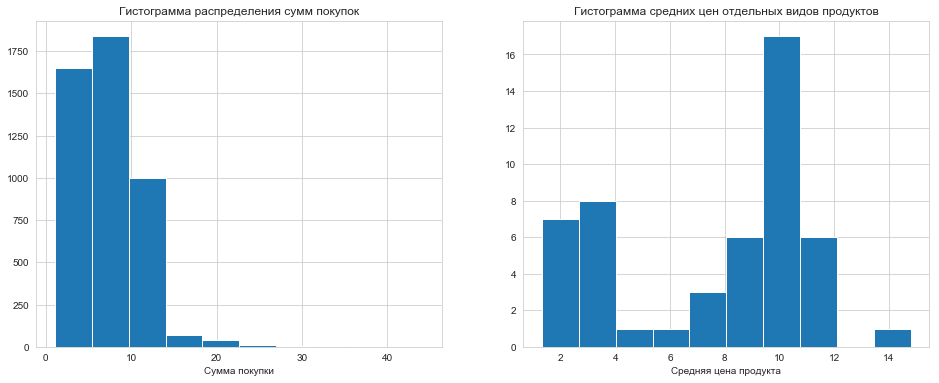

In [72]:
# данные для 1-го графика (распр сумм покупок)
data_for_hist_1 = dat["item_price"].values
# данные для 2-го графика (средн цены отд видов продуктов)
mean_price = []
for i in np.unique(dat["item_name"]):
    item_price_for_one = dat[dat["item_name"] == i]["item_price"]
    mean_price.append(np.mean(item_price_for_one))
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.hist(data_for_hist_1)
plt.title("Гистограмма распределения сумм покупок")
plt.xlabel("Сумма покупки")
plt.subplot(1, 2, 2)
plt.hist(mean_price)
plt.title("Гистограмма средних цен отдельных видов продуктов")
plt.xlabel("Средняя цена продукта")
plt.show()

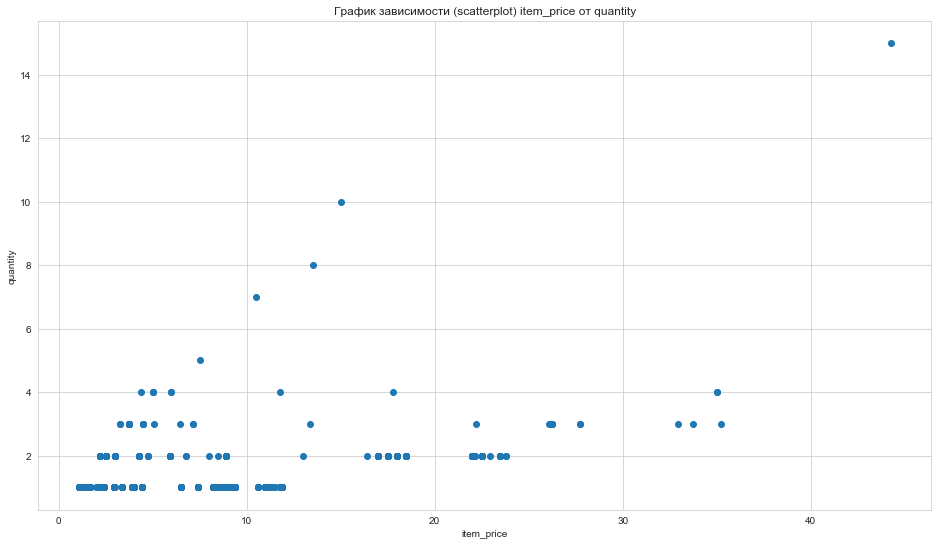

In [73]:
# Постройте график зависимости (scatterplot) item_price от quantity [0.5 балла]
# здесь ваш код:
plt.figure(figsize=(16, 9))
plt.scatter(dat["item_price"], dat["quantity"])
plt.title("График зависимости (scatterplot) item_price от quantity")
plt.xlabel("item_price")
plt.ylabel("quantity")
plt.show()

In [74]:
#Добавьте в датафрейм dat новую колонку day_of_week - слуйчайную величину от 1 до 7. [0 баллов]
#здесь ваш код:
dat['day_of_week'] = np.random.randint(1, 7, size = len(dat["item_price"]))

In [75]:
dat['day_of_week'].head(5)

0    6
1    1
2    4
3    1
4    6
Name: day_of_week, dtype: int64

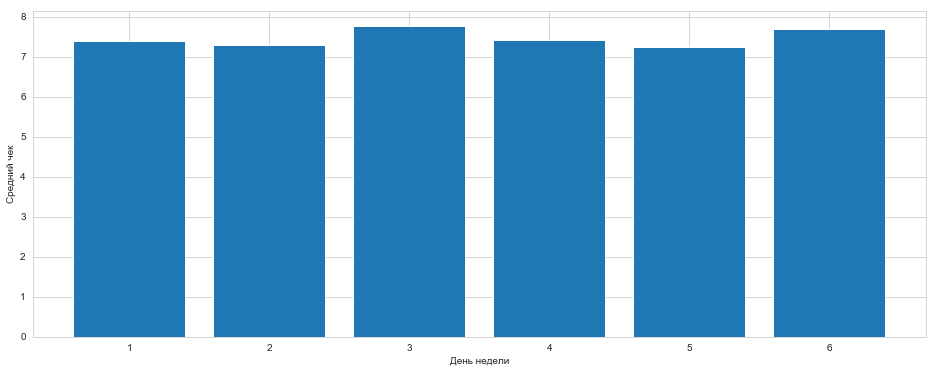

In [76]:
# Нарисуйте барплот. По оси икс - день недели, по оси игрек - средний чек за покупку в этот день недели. [1 балл]
# здесь ваш гарфик:
mean_check = []
unique_days_of_week = np.unique(dat["day_of_week"])
for one_day_of_week in unique_days_of_week:
    item_price_in_one_day_of_week = dat[dat["day_of_week"] == one_day_of_week]["item_price"]
    mean_check.append(np.mean(item_price_in_one_day_of_week))
plt.figure(figsize=(16, 6))
plt.bar(unique_days_of_week, mean_check)
plt.ylabel("Средний чек")
plt.xlabel("День недели")
plt.show()

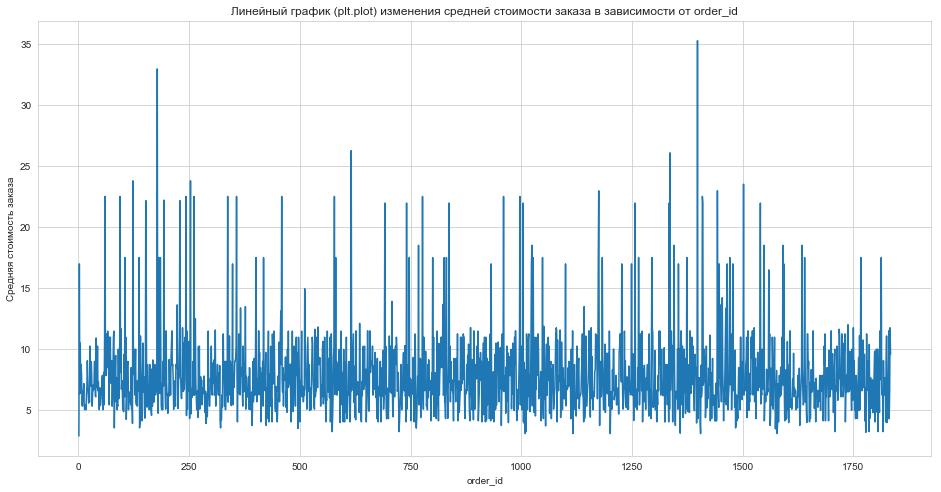

In [77]:
# Нарисуйте линейный график (plt.plot) изменения средней стоимости заказа в зависимости от order_id [1 балл]
# здесь ваш код:
mean_item_price_by_order_id = []
unique_order_id = np.unique(dat["order_id"])
for un_order_id in unique_order_id:
    items_price_in_one_order = dat[dat["order_id"] == un_order_id]["item_price"]
    mean_item_price_by_order_id.append(np.mean(items_price_in_one_order))
plt.figure(figsize=(16, 8))
plt.plot(unique_order_id, mean_item_price_by_order_id)
plt.xlabel("order_id")
plt.ylabel("Средняя стоимость заказа")
plt.title("Линейный график (plt.plot) изменения средней стоимости заказа в зависимости от order_id")
plt.show()